# Import Libraries

In [48]:
import numpy as np 
import pandas as pd 

# Reading data using Pandas

**when reading data using pandas using traditional way**

**df=pd.read_csv(/kaggle/input/ecommerce-data/data.csv)**

**show this error 
("UnicodeDecodeError: 'utf8' codec can't decode byte 0xa5 in position 0: invalid start byte")**

**and I solved it by using This encoding = 'unicode_escape' in the command read_csv**

**solution from stack overflow throught this link :-
https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s**

In [49]:
df=pd.read_csv("/kaggle/input/ecommerce-data/data.csv", encoding= 'unicode_escape')

# Exploring data 

In [50]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

# First Five Rows of dataset 

In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [52]:
df.tail

<bound method NDFrame.tail of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerI

# Statistics inFo a bout dataset

In [53]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [54]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [55]:
df.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

# To find how many nan values on data

In [56]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [57]:
df.shape

(541909, 8)

In [58]:
df.duplicated().sum()


5268

In [59]:
df.dropna(subset=['CustomerID'],axis=0,inplace=True)
df.shape

(406829, 8)

In [60]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**This command is used to delete duplicated values from dataset**

**Pandas drop_duplicates() function removes duplicate rows from the DataFrame**

In [61]:
df.drop_duplicates(subset=None, keep=False, inplace=True)

In [62]:
df.duplicated().sum()


0

In [77]:
df['InvoiceNo'].value_counts()
df['StockCode'].value_counts()
df['Description'].value_counts()
df['InvoiceDate'].value_counts()
df['UnitPrice'].value_counts()
df['CustomerID'].value_counts()
df['Country'].value_counts()


35    351964
14      9465
13      8459
10      7465
30      2523
23      2371
3       2069
32      1877
26      1463
0       1257
24      1086
18       803
6        756
12       695
7        601
31       460
1        401
9        389
19       358
25       341
33       291
17       244
36       238
29       229
16       182
5        151
15       146
22       127
34        68
11        61
27        58
20        45
21        35
4         32
8         30
2         17
28        10
Name: Country, dtype: int64

# Data visualization of dataset

# Dashboard for Monthly sale

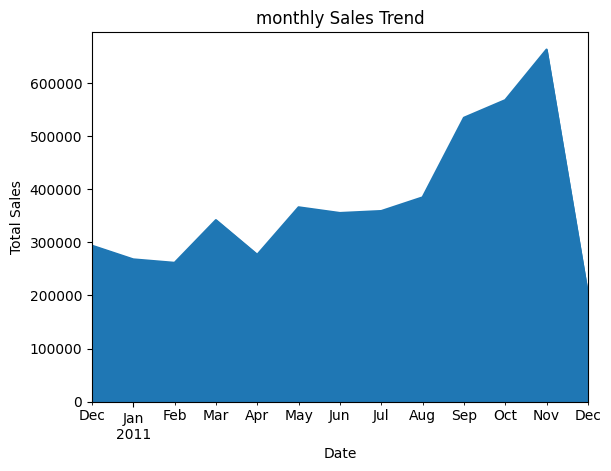

In [63]:
import matplotlib.pyplot as plt

df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

monthly_sales=df.groupby(pd.Grouper(key='InvoiceDate',freq='M'))['Quantity'].sum()

monthly_sales.plot(kind='area', stacked=True)

plt.title('monthly Sales Trend')

plt.xlabel('Date')

plt.ylabel('Total Sales')

plt.show()

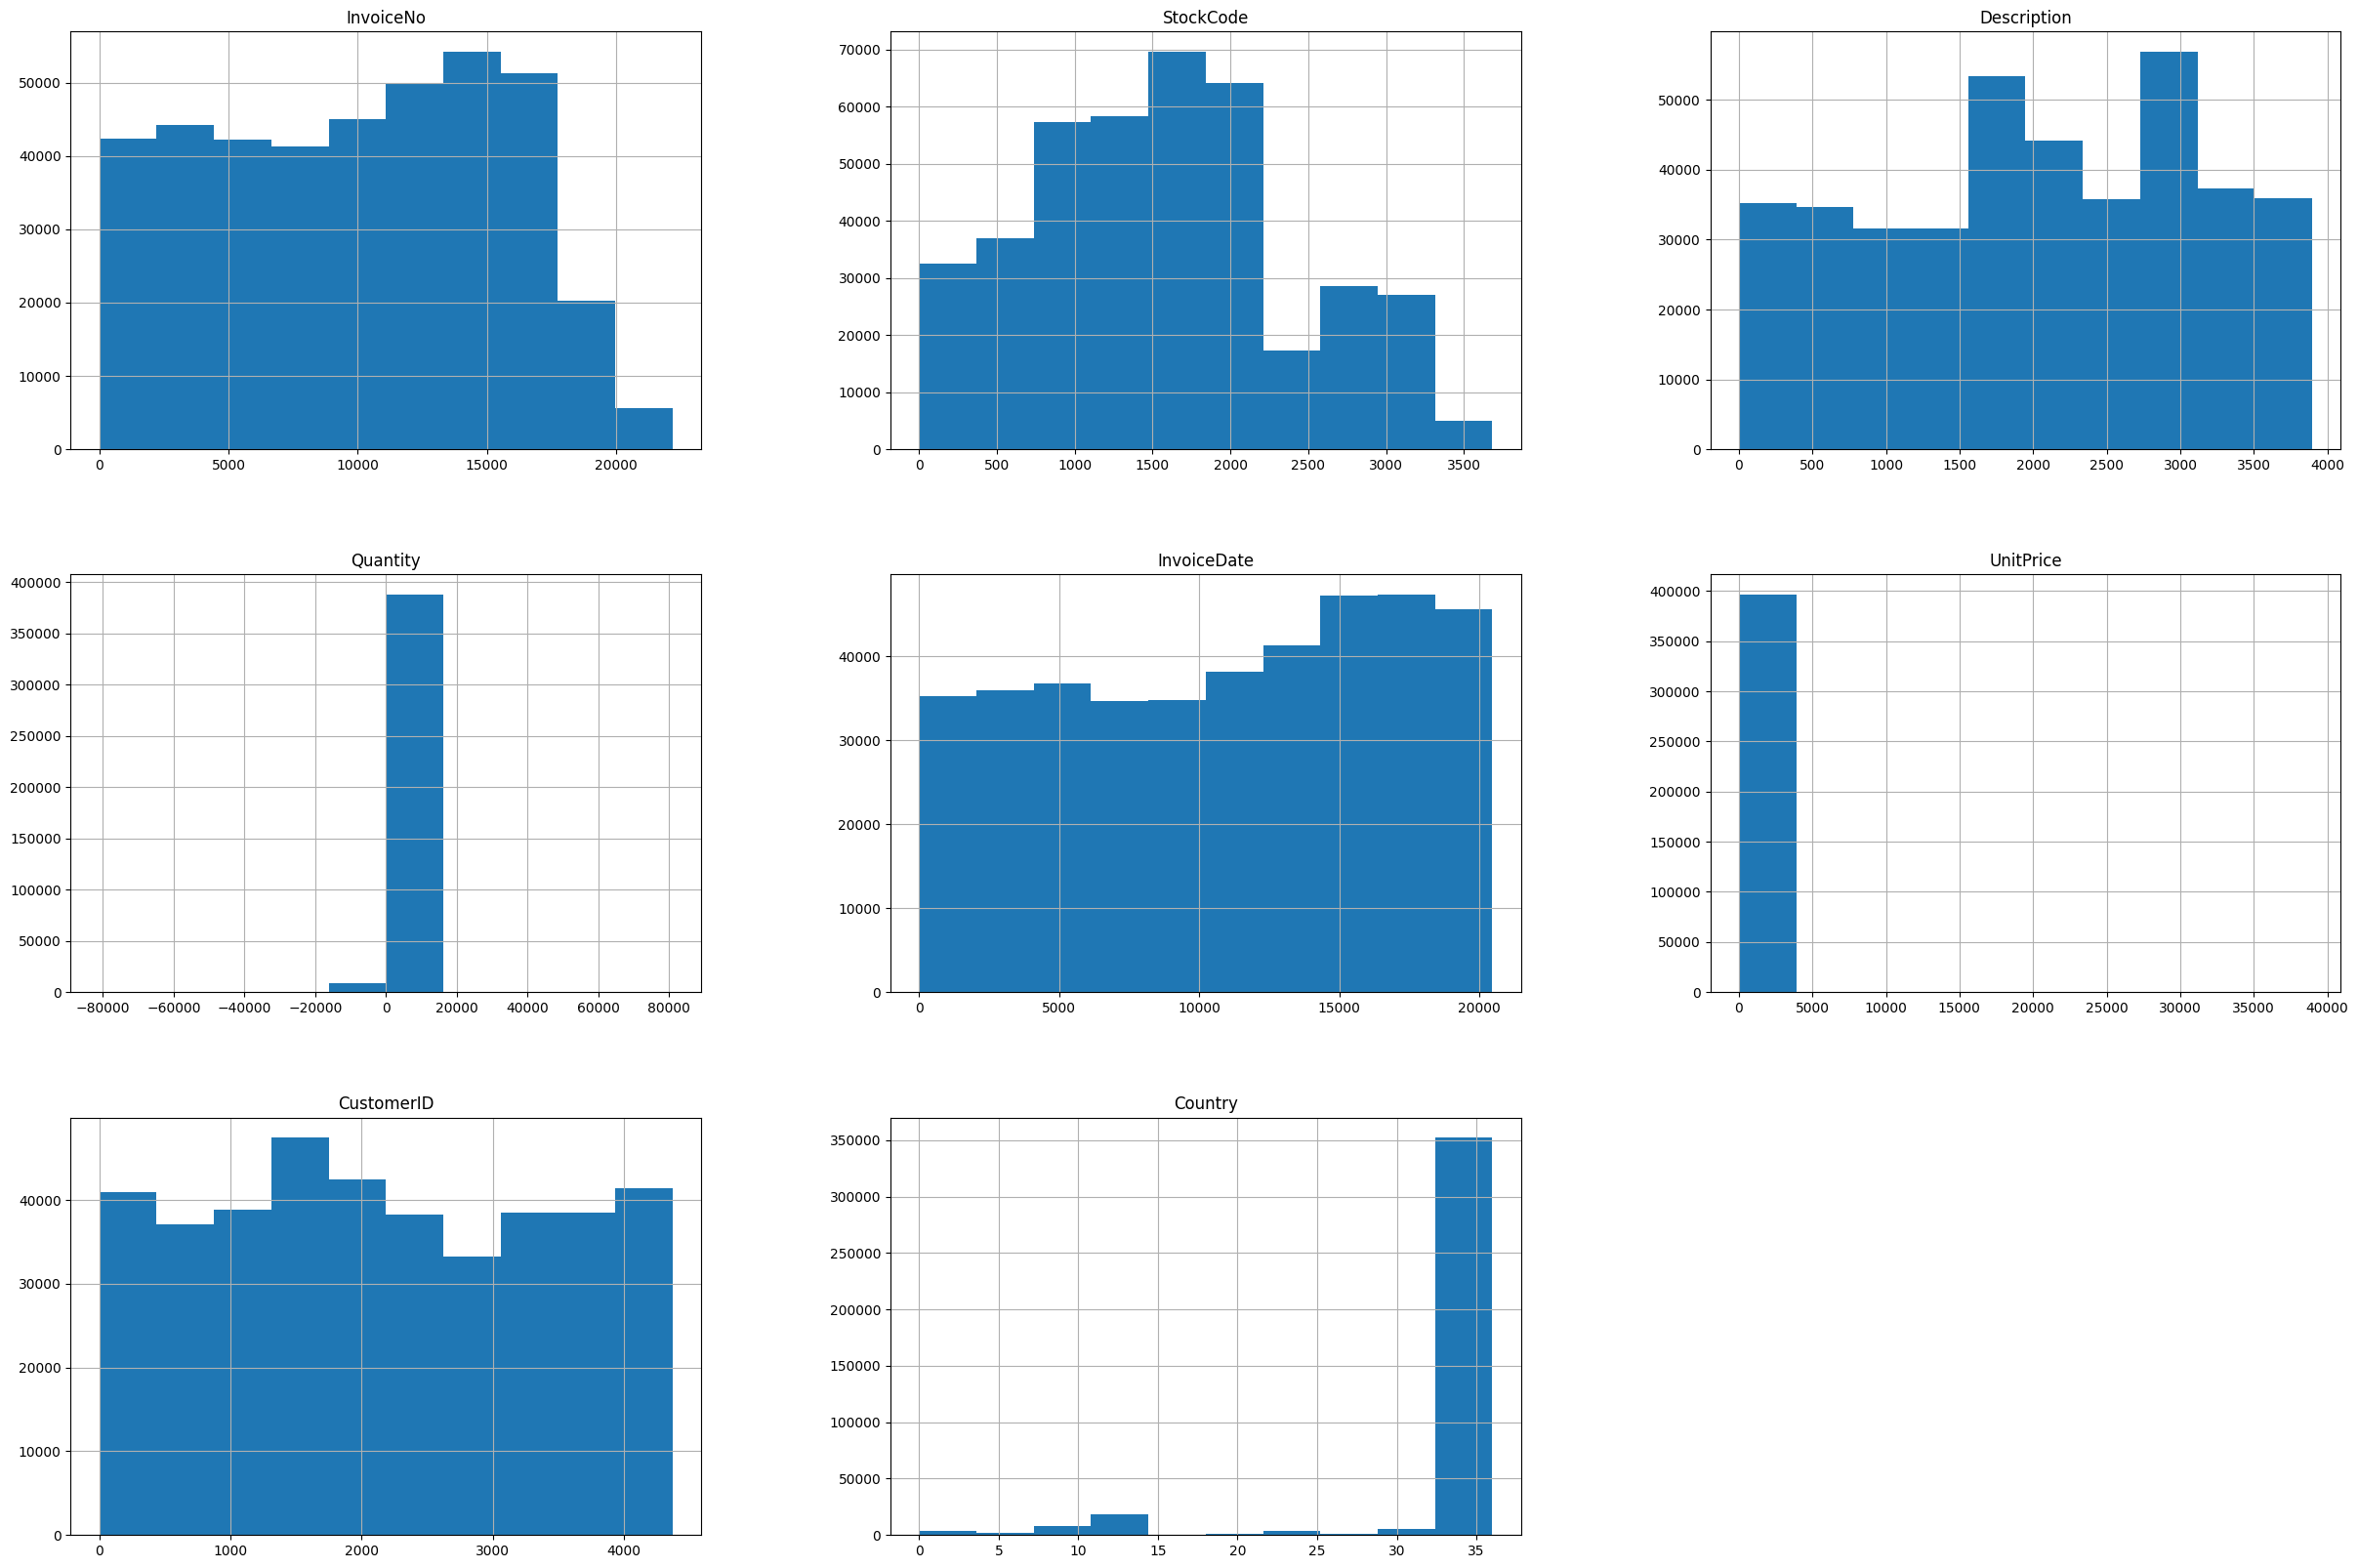

In [88]:
df.hist(figsize=(30,20))
plt.show()

<AxesSubplot: >

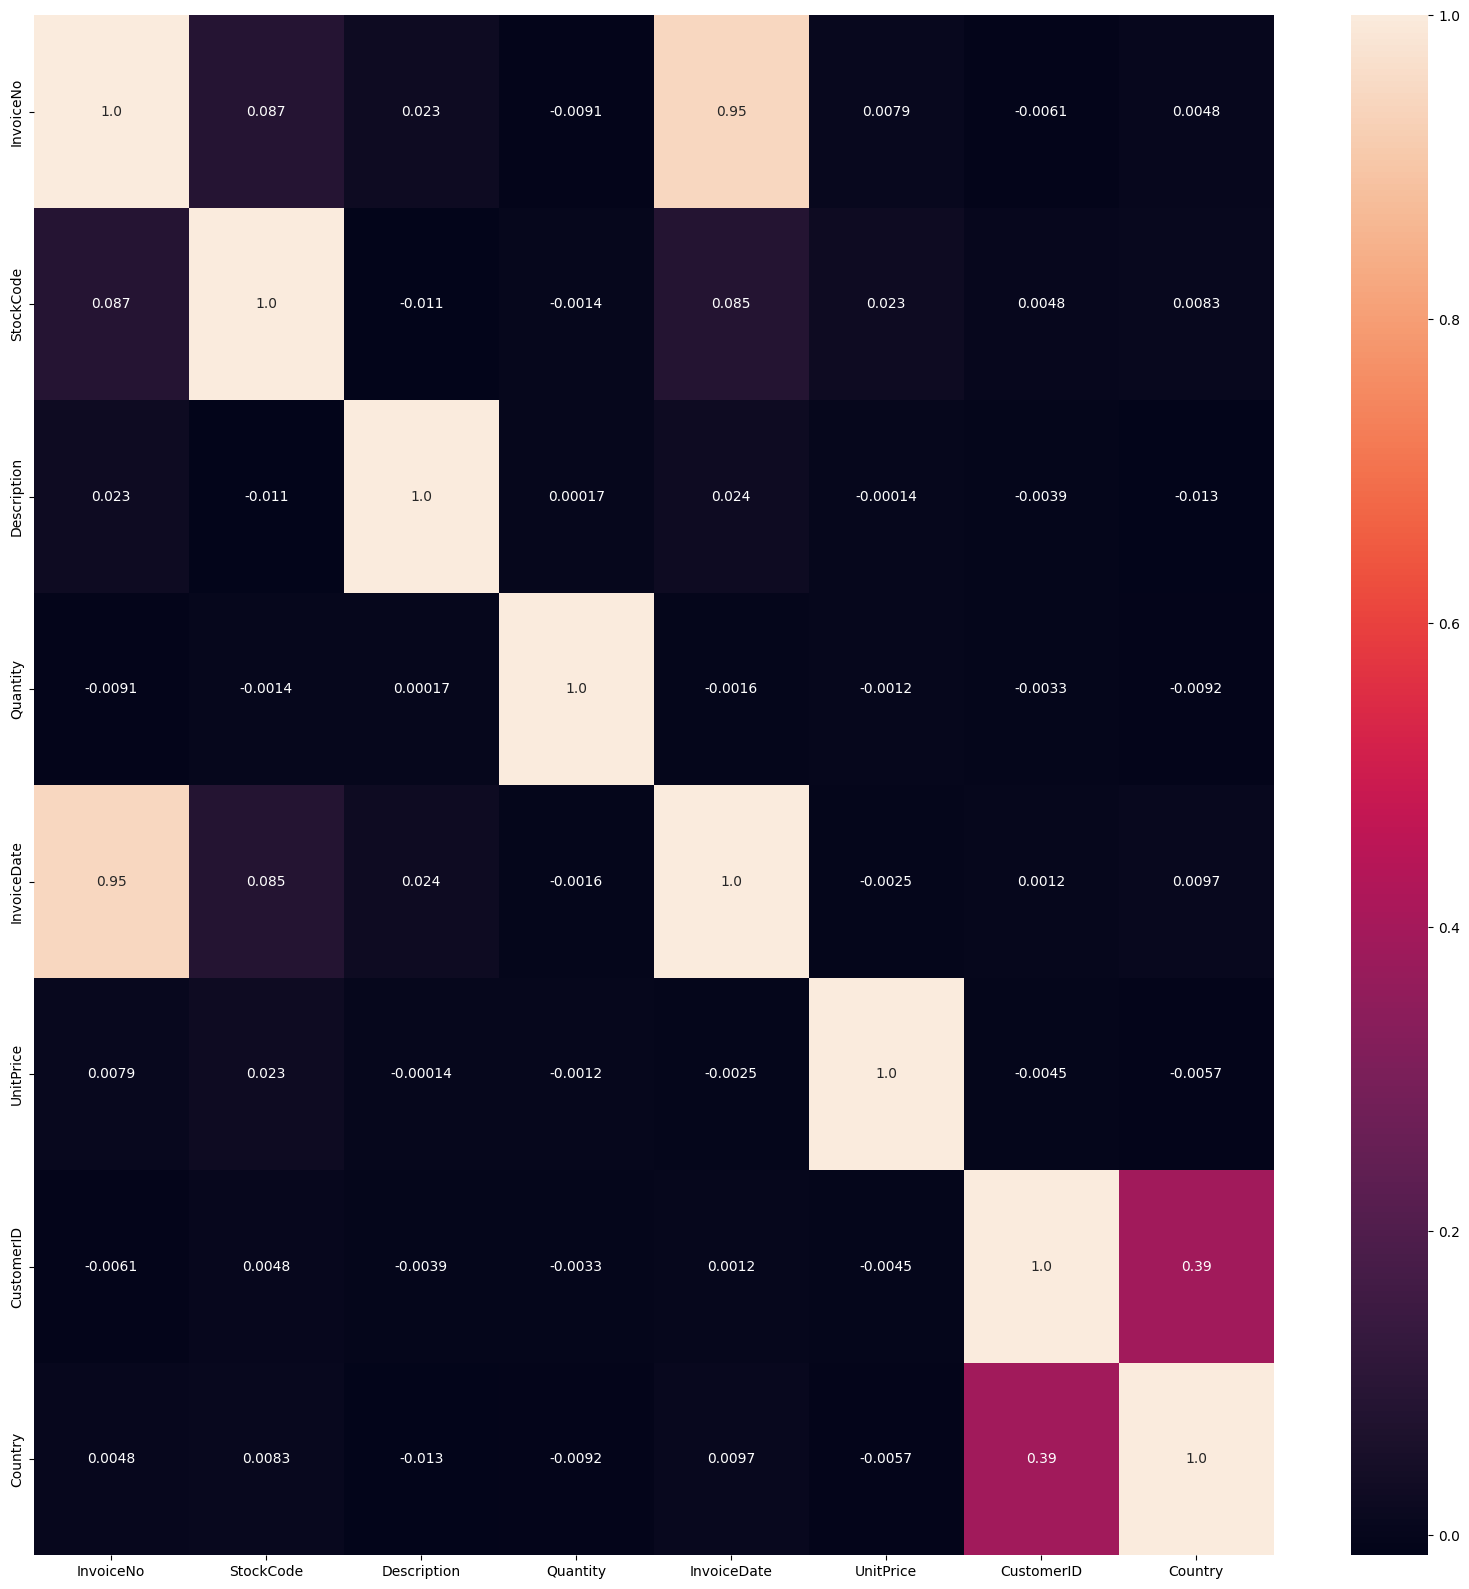

In [90]:
import seaborn as sns

plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), annot=True, fmt=".2")

 # convert string data to numreic data




In [79]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['InvoiceNo'] = encoder.fit_transform(df['InvoiceNo'])

InvoiceNo  = {index : label for index, label in enumerate(encoder.classes_)}

InvoiceNo 

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [80]:
df['StockCode'] = encoder.fit_transform(df['StockCode'])

StockCode  = {index : label for index, label in enumerate(encoder.classes_)}

StockCode 

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [81]:
df['Description'] = encoder.fit_transform(df['Description'])

Description  = {index : label for index, label in enumerate(encoder.classes_)}

Description 

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [82]:
df['InvoiceDate'] = encoder.fit_transform(df['InvoiceDate'])

InvoiceDate  = {index : label for index, label in enumerate(encoder.classes_)}

InvoiceDate

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [83]:
df['Country'] = encoder.fit_transform(df['Country'])

Country  = {index : label for index, label in enumerate(encoder.classes_)}

Country

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36}

In [84]:
df['CustomerID'] = encoder.fit_transform(df['CustomerID'])

CustomerID  = {index : label for index, label in enumerate(encoder.classes_)}

CustomerID

{0: 12346.0,
 1: 12347.0,
 2: 12348.0,
 3: 12349.0,
 4: 12350.0,
 5: 12352.0,
 6: 12353.0,
 7: 12354.0,
 8: 12355.0,
 9: 12356.0,
 10: 12357.0,
 11: 12358.0,
 12: 12359.0,
 13: 12360.0,
 14: 12361.0,
 15: 12362.0,
 16: 12363.0,
 17: 12364.0,
 18: 12365.0,
 19: 12367.0,
 20: 12370.0,
 21: 12371.0,
 22: 12372.0,
 23: 12373.0,
 24: 12374.0,
 25: 12375.0,
 26: 12377.0,
 27: 12378.0,
 28: 12379.0,
 29: 12380.0,
 30: 12381.0,
 31: 12383.0,
 32: 12384.0,
 33: 12386.0,
 34: 12388.0,
 35: 12390.0,
 36: 12391.0,
 37: 12393.0,
 38: 12394.0,
 39: 12395.0,
 40: 12397.0,
 41: 12398.0,
 42: 12399.0,
 43: 12401.0,
 44: 12402.0,
 45: 12403.0,
 46: 12405.0,
 47: 12406.0,
 48: 12407.0,
 49: 12408.0,
 50: 12409.0,
 51: 12410.0,
 52: 12412.0,
 53: 12413.0,
 54: 12414.0,
 55: 12415.0,
 56: 12417.0,
 57: 12418.0,
 58: 12420.0,
 59: 12421.0,
 60: 12422.0,
 61: 12423.0,
 62: 12424.0,
 63: 12425.0,
 64: 12426.0,
 65: 12427.0,
 66: 12428.0,
 67: 12429.0,
 68: 12430.0,
 69: 12431.0,
 70: 12432.0,
 71: 12433.0,
 7

In [85]:
y = df['Country'].values
X = df.drop(columns = ['Country','CustomerID'])

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])


x 
 [[0.00000000e+00 8.82161282e-01 9.54043646e-01 5.00037039e-01
  0.00000000e+00 6.54349500e-05]
 [0.00000000e+00 7.19250611e-01 9.56097561e-01 5.00037039e-01
  0.00000000e+00 8.69899923e-05]
 [0.00000000e+00 7.75183275e-01 2.21052632e-01 5.00049386e-01
  0.00000000e+00 7.05671029e-05]
 [0.00000000e+00 7.61064350e-01 4.65468549e-01 5.00037039e-01
  0.00000000e+00 8.69899923e-05]
 [0.00000000e+00 7.60792832e-01 7.12708601e-01 5.00037039e-01
  0.00000000e+00 8.69899923e-05]
 [0.00000000e+00 4.35786044e-01 7.64313222e-01 5.00012346e-01
  0.00000000e+00 1.96304850e-04]
 [0.00000000e+00 2.04995927e-01 3.70731707e-01 5.00037039e-01
  0.00000000e+00 1.09058250e-04]
 [4.50775334e-05 4.04561499e-01 4.01026958e-01 5.00037039e-01
  4.88878025e-05 4.74724147e-05]
 [4.50775334e-05 4.04289981e-01 4.00256739e-01 5.00037039e-01
  4.88878025e-05 4.74724147e-05]
 [9.01550667e-05 8.33288080e-01 5.57124519e-02 5.00197543e-01
  9.77756050e-05 4.33666923e-05]]
y 
 [35 35 35 35 35 35 35 35 35 35]


# Split dataset to traing and testing

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=0)

In [93]:
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)


x_train shape is: (396737, 6)
x_test shape is: (30, 6)
y_train shape is: (396737,)
y_test shape is: (30,)


# Classification Model RandomForestClassifier

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.8879081104106751
DecisionTreeClassifierModel Test Score is :  0.8
DecisionTreeClassifierModel Classes are :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
DecisionTreeClassifierModel feature importances are :  [0.         0.38333296 0.         0.48878207 0.         0.12788496]
----------------------------------------------------
Predicted Value for DecisionTreeClassifierModel is :  [35 35 35 35 35 35 35 35 35 35]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[1.70305728e-03 8.57401252e-04 4.69808905e-05 5.41454763e-03
  1.17452226e-04 3.40611456e-04 2.76012732e-03 2.46649675e-03
  0.00000000e+00 3.52356679e-04 2.17638975e-02 1.87923562e-04
  1.40942672e-03 1.58677958e-02 1.89332989e-02 3.64101902e-04
  3.99337569e-04 5.75515909e-04 2.71314643e-03 1.64433117e-04
  1.17452226e-04 0.00000000e+00 5.52025464e-04 1.38593627e-03
  2.56045853e-03 1.1157961

# Classification Model LogisticRegression


In [112]:
from sklearn.linear_model import LogisticRegression


In [114]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(x_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = LogisticRegressionModel.predict(x_test)
y_pred_prob = LogisticRegressionModel.predict_proba(x_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

LogisticRegressionModel Train Score is :  0.8870864073681053
LogisticRegressionModel Test Score is :  0.8
LogisticRegressionModel Classes are :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
LogisticRegressionModel No. of iteratios is :  [18]
----------------------------------------------------
Predicted Value for LogisticRegressionModel is :  [35 35 35 35 35 35 35 35 35 35]
Prediction Probabilities Value for LogisticRegressionModel is :  [[4.43031302e-03 7.93804546e-04 7.00282832e-05 5.45695149e-03
  1.45824396e-04 4.93878755e-04 2.21067338e-03 2.08790867e-03
  8.89143086e-05 7.84867492e-04 1.66363742e-02 2.14636419e-04
  2.07088143e-03 2.22178289e-02 2.65152189e-02 4.55426358e-04
  5.09867689e-04 5.65830705e-04 1.77773705e-03 1.59902539e-03
  2.28722580e-04 1.12447266e-04 1.99903040e-04 6.97258360e-03
  2.13922320e-03 1.07030002e-03 3.94630995e-03 4.71723843e-05
  3.88348375e-05 8.97194014e-04 7.52699289e-03 1.454278

# Classification Model evolution

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  24


In [117]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.8000000000000002


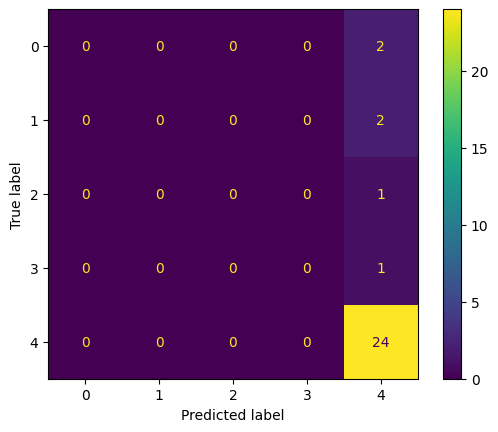

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# RandomForestClassifier   Model  confusion_matrix
y_pred = RandomForestClassifierModel.predict(x_test)
CM2 = confusion_matrix(y_test, y_pred)

CM2_display = ConfusionMatrixDisplay(CM2).plot()

